# Import **Library**

In [2]:
# Import Library
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

# Import **Dataset**

In [3]:
#Import dataset csv format from google drive
sheet_url = 'https://drive.google.com/file/d/11Akl7gVqyj25h85eyiwMyfohB8oDYSqf/view?usp=sharing' #assign link to a variable
sheet_url_replace = 'https://drive.google.com/uc?id=' + sheet_url.split('/')[-2] #replace the link

print(sheet_url_replace)

carsales = pd.read_csv(sheet_url_replace) #Import/read the csv file into pandas dataframe

https://drive.google.com/uc?id=11Akl7gVqyj25h85eyiwMyfohB8oDYSqf


In [4]:
carsales.head(10)

,Manufacturer,Model,Sales_Unit,__year_resale_value,Vehicle_type,Sale_Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Date,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,1/1/2019,5.828.014.952
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,1/2/2019,9.137.077.766
2,Acura,CL,14.114,18.225,Passenger,25.50,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/3/2019,8.435.131.532
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,1/4/2019,9.138.977.933
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,1/5/2019,627.776.392
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22,1/6/2019,8.456.510.502
6,Audi,A8,1.380,29.000,Passenger,62.00,4.2,310,113.0,74.0,198.2,3.902,23.7,21,1/7/2019,1.346.568.582
7,BMW,323i,19.747,27.255,Passenger,26.99,2.5,170,107.3,68.4,176.0,3.179,16.6,26,1/8/2019,7.119.120.671
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193,107.3,68.5,176.0,3.197,16.6,24,1/9/2019,8.187.706.856
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193,111.4,70.9,188.0,3.472,18.5,25,1/10/2019,839.987.238


In [5]:
carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_Unit           157 non-null    float64
 3   __year_resale_value  157 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Sale_Price           157 non-null    float64
 6   Engine_size          157 non-null    float64
 7   Horsepower           157 non-null    int64  
 8   Wheelbase            157 non-null    float64
 9   Width                157 non-null    float64
 10  Length               157 non-null    float64
 11  Curb_weight          157 non-null    float64
 12  Fuel_capacity        157 non-null    float64
 13  Fuel_efficiency      157 non-null    int64  
 14  Date                 157 non-null    object 
 15  Power_perf_factor    157 non-null    obj

In [6]:
carsales.shape

(157, 16)

In [7]:
carsales.describe()

,Sales_Unit,__year_resale_value,Sale_Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,64.896994,19.225732,27.548962,3.063694,186.356688,107.503185,71.142675,187.398726,3.378134,17.945860,23.840764
std,120.120006,12.313716,14.418976,1.041889,56.748999,7.619412,3.442014,13.406447,0.627095,3.876185,4.249449
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000
25%,14.690000,12.250000,18.145000,2.300000,150.000000,103.000000,68.400000,177.600000,2.975000,15.800000,21.000000
50%,31.038000,15.380000,23.400000,3.000000,180.000000,107.000000,70.500000,188.000000,3.342000,17.200000,24.000000
75%,70.227000,20.190000,31.965000,3.500000,215.000000,112.200000,73.400000,196.100000,3.778000,19.500000,26.000000
max,954.000000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000


# **Data Cleaning**

In [8]:
# Pemeriksaan missing value
missing_values = carsales.isnull().sum()
print(missing_values)

Manufacturer           0
Model                  0
Sales_Unit             0
__year_resale_value    0
Vehicle_type           0
Sale_Price             0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Date                   0
Power_perf_factor      0
dtype: int64


In [9]:
duplicate_rows = carsales[carsales.duplicated()]
print("Jumlah duplikat data:")
print(len(duplicate_rows))

Jumlah duplikat data:
0


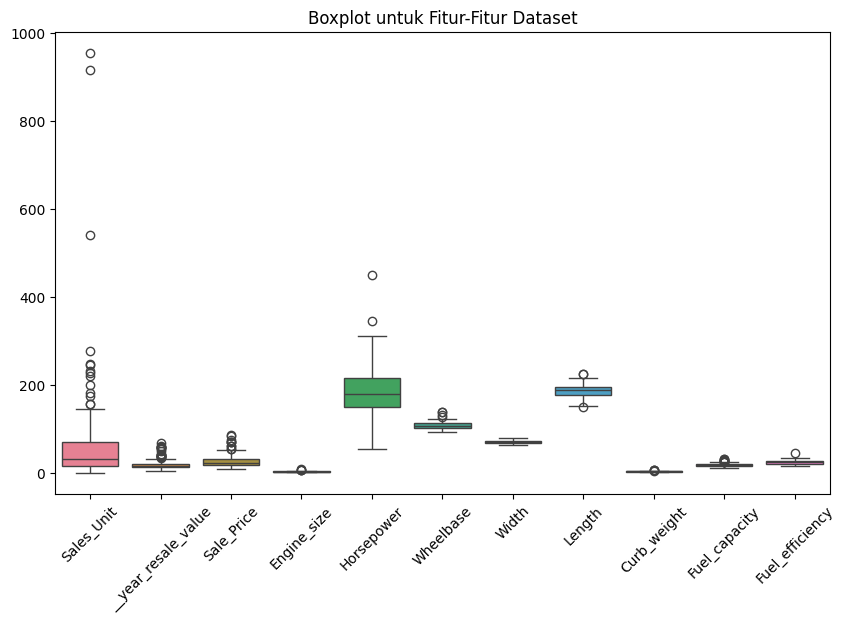

In [10]:
# Menganalisis outlier menggunakan boxplot
plt.figure(figsize=(10, 6))
# Memastikan kolom 'Outcome' ada dalam dataset
if 'Outcome' in carsales.columns:
    sns.boxplot(data=carsales.drop(columns='Outcome'))
else:
    sns.boxplot(data=carsales)
plt.title('Boxplot untuk Fitur-Fitur Dataset')
plt.xticks(rotation=45)
plt.show()

In [11]:
carsales['Date'] = pd.to_datetime(carsales['Date'])
carsales['sale_month']= carsales['Date'].dt.month_name()
print(carsales.dtypes)

Manufacturer                   object
Model                          object
Sales_Unit                    float64
__year_resale_value           float64
Vehicle_type                   object
Sale_Price                    float64
Engine_size                   float64
Horsepower                      int64
Wheelbase                     float64
Width                         float64
Length                        float64
Curb_weight                   float64
Fuel_capacity                 float64
Fuel_efficiency                 int64
Date                   datetime64[ns]
Power_perf_factor              object
sale_month                     object
dtype: object


In [12]:
carsales.head()

,Manufacturer,Model,Sales_Unit,__year_resale_value,Vehicle_type,Sale_Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Date,Power_perf_factor,sale_month
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2019-01-01,5.828.014.952,January
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,2019-01-02,9.137.077.766,January
2,Acura,CL,14.114,18.225,Passenger,25.50,3.2,225,106.9,70.6,192.0,3.470,17.2,26,2019-01-03,8.435.131.532,January
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,2019-01-04,9.138.977.933,January
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,2019-01-05,627.776.392,January


# **EDA**

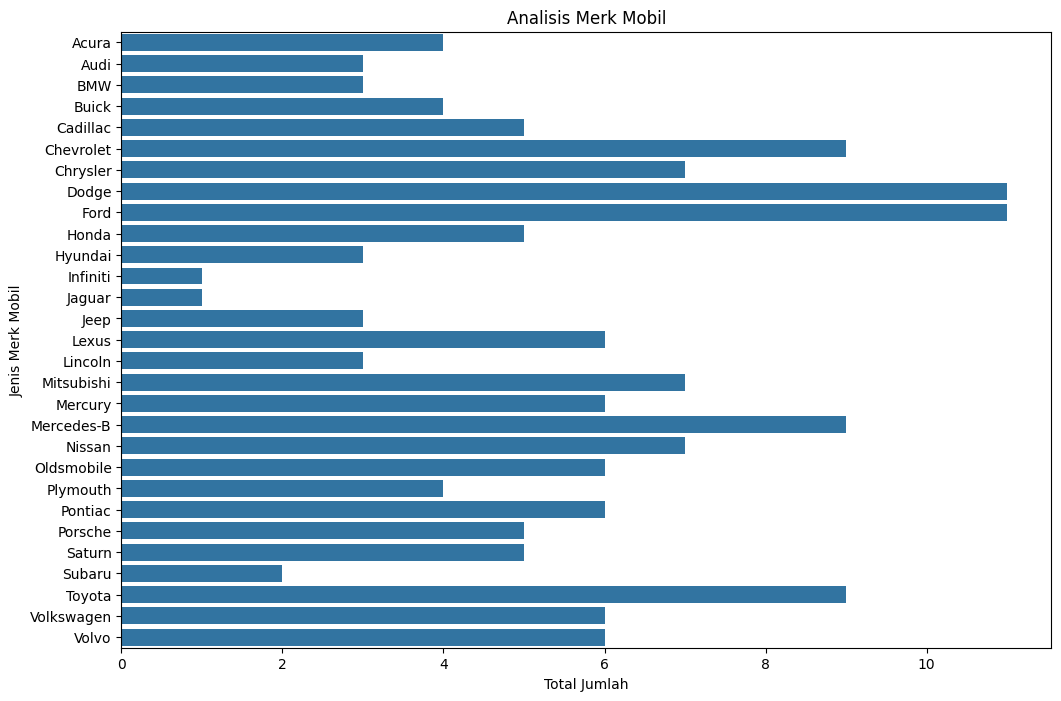

In [13]:
# Analisis Produk
plt.figure(figsize=(12, 8))
sns.countplot(y='Manufacturer', data=carsales)
plt.title('Analisis Merk Mobil')
plt.xlabel('Total Jumlah')
plt.ylabel('Jenis Merk Mobil')
plt.show()

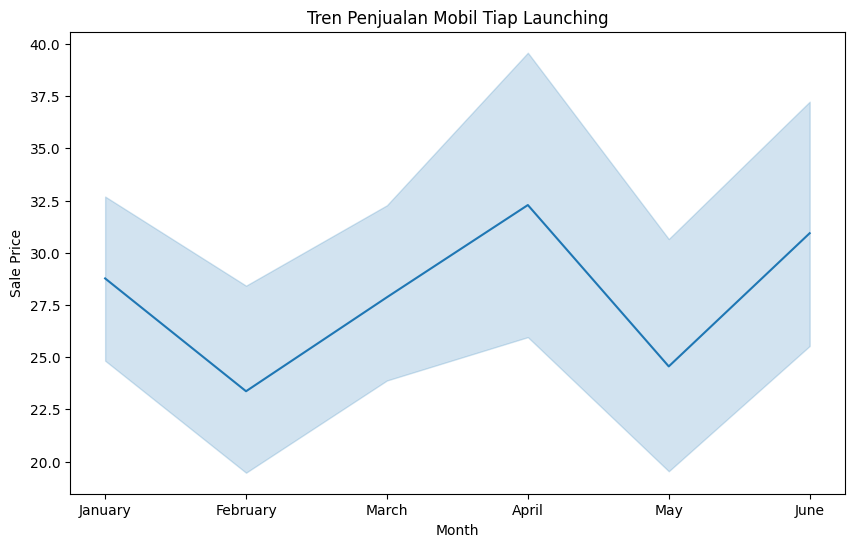

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(x='sale_month',y='Sale_Price',data=carsales)
plt.title('Tren Penjualan Mobil Tiap Launching')
plt.ylabel('Sale Price')
plt.xlabel('Month')
plt.show();

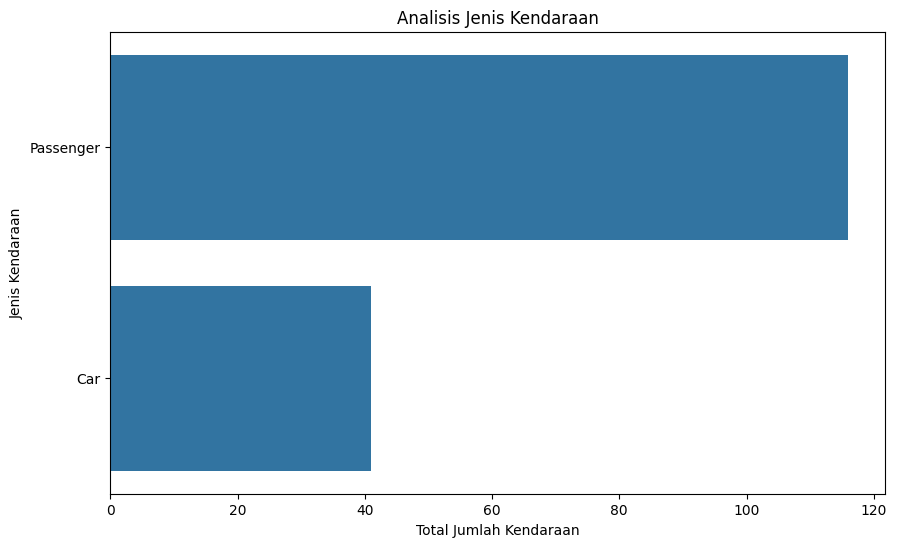

In [15]:
# Analisis Jenis Kendaraan
plt.figure(figsize=(10, 6))
sns.countplot(y='Vehicle_type', data=carsales)
plt.title('Analisis Jenis Kendaraan')
plt.xlabel('Total Jumlah Kendaraan')
plt.ylabel('Jenis Kendaraan')
plt.show()

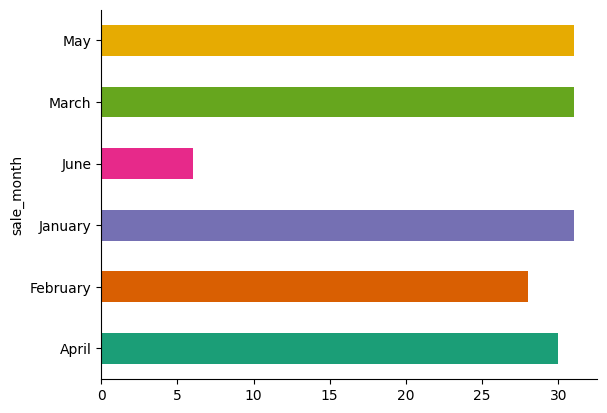

In [16]:
carsales.groupby('sale_month').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# DATA TRANSFORMATION

In [17]:
print(carsales['Vehicle_type'].value_counts())

Vehicle_type
Passenger    116
Car           41
Name: count, dtype: int64


In [18]:
carsales.replace({'Vehicle_type':{'Passenger':0, 'Car':1}}, inplace =True)

In [42]:
#seleksi fitur
features = ['Vehicle_type', 'Engine_size', 'Horsepower', 'Curb_weight', 'Fuel_capacity']
x = carsales[features]
y = carsales['Sale_Price']

In [20]:
carsales['Vehicle_type'] = carsales['Vehicle_type'].astype(int)

In [41]:
# split data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(40,)

In [40]:
# membuat model regresi linear
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [43]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linear = ', score)

akurasi model regresi linear =  0.6823758155404179


In [45]:
# membuat inputan model regresi linear
input_data = np.array([[13.2, 1.8, 2639, 0, 140]])

prediction = lr.predict(input_data)

print("Estimasi Harga Mobil Bekas: ", prediction)

Estimasi Harga Mobil Bekas:  [564.42963023]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **EVALUATION**

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
y_test_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

model_mse = {}
model_rmse = {}
model_r2 = {}

model_mse['Linear Regression'] = mse
model_rmse['Linear Regression'] = rmse
model_r2['Linear Regression'] = r2

print('Mean Squared Error is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2))

Mean Squared Error is : 72.05492102061092
Root Mean Squared Error of the model is : 8.488517009502361
R-squared value of the model is : 0.6823758155404179


In [26]:
### Melatih model Regresi Vektor Dukungan pada dataset

support_vector_regressor = SVR(kernel = 'rbf')
support_vector_regressor.fit(x_train, y_train)

SVR()

In [27]:
### Memprediksi hasil set Tes

y_pred = support_vector_regressor.predict(x_test)

In [28]:
### Menghitung MSE, RMSE dan R2 score untuk model

mse = round(mean_squared_error(y_test, y_pred), 3)
rmse = round(np.sqrt(mse), 3)
r2 = round(r2_score(y_test, y_pred), 3)

model_mse['Support Vector Regression'] = mse
model_rmse['Support Vector Regression'] = rmse
model_r2['Support Vector Regression'] = r2

print('Mean Squared Error is : {}'.format(mse))
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2))

Mean Squared Error is : 151.883
Root Mean Squared Error of the model is : 12.324
R-squared value of the model is : 0.33


In [29]:
model_mse

{'Linear Regression': 72.05492102061092, 'Support Vector Regression': 151.883}

In [30]:
### Looking at the model rmse dictionary

model_rmse

{'Linear Regression': 8.488517009502361, 'Support Vector Regression': 12.324}

In [31]:
model_r2

{'Linear Regression': 0.6823758155404179, 'Support Vector Regression': 0.33}

In [32]:
### Tabulating the results

table = []
table.append(['S.No.', 'Classification Model', 'Mean Squared Error', 'Root Mean Squared Error', 'R-squared'])
count = 1

for model in model_rmse:
    row = [count, model, model_mse[model], model_rmse[model], model_r2[model]]
    table.append(row)
    count += 1

print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤═══════════════════════════╤══════════════════════╤═══════════════════════════╤═════════════╕
│   S.No. │ Classification Model      │   Mean Squared Error │   Root Mean Squared Error │   R-squared │
╞═════════╪═══════════════════════════╪══════════════════════╪═══════════════════════════╪═════════════╡
│       1 │ Linear Regression         │              72.0549 │                   8.48852 │    0.682376 │
├─────────┼───────────────────────────┼──────────────────────┼───────────────────────────┼─────────────┤
│       2 │ Support Vector Regression │             151.883  │                  12.324   │    0.33     │
╘═════════╧═══════════════════════════╧══════════════════════╧═══════════════════════════╧═════════════╛


# **KESIMPULAN**

MSE: Nilai ini menunjukkan rata-rata dari kuadrat kesalahan. Nilai yang lebih kecil lebih baik.

RMSE: Nilai ini adalah akar kuadrat dari MSE. Nilai yang lebih kecil lebih baik dan lebih mudah diinterpretasikan.

R² Score: Nilai ini menunjukkan seberapa baik model dalam menjelaskan variabilitas data target. Nilai yang lebih dekat ke 1 lebih baik. Untuk model yang akurat, kita harus menemukan nilai MSE dan RMSE yang rendah serta nilai R² yang tinggi.

# Save Model

In [39]:
import pickle

filename = 'estimasi_harga.sav'
pickle.dump(lr,open(filename, 'wb'))